In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1=pd.read_csv('India_vessle.csv').drop(['Unnamed: 0','Year-month'], axis=1)
df2=pd.read_csv('India_loc_port.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
df1.head()

,date,portname,country,passenger,cargo,tanker,pleasureCraft,fishing,tug,other
0,2017-07-15,MUMBAI,India,0,8,13,0,0,5,34
1,2017-07-15,KAKINADA,India,0,1,0,0,0,0,7
2,2017-07-15,KOLKATA ANCH,India,0,6,2,0,0,0,0
3,2017-07-15,KATTUPALLI,India,0,0,0,0,0,0,2
4,2017-07-15,PANAJI,India,0,0,0,0,0,0,2


In [4]:
df2.head()

,PortName,Latitude,Longitude,Coast,Size,color
0,BADAPUTI,19.3039,84.9655,Eastern,Small,icon2.png
1,BEYPORE,11.1736,75.8040,Western,Very Small,icon1.png
2,BHARATI SHIPYARD,17.0405,73.2863,Western,Very Small,icon1.png
3,BHAVNAGAR,21.8029,72.1157,Western,Very Small,icon1.png
4,BHAVNAGAR NEW PORT,21.7609,72.2334,Western,Very Small,icon1.png


In [5]:
v=[]
u=[]

for i in range(0,len(df1)):
    x=0
    y=0
    for j in range(0,len(df2)):
        if df1['portname'][i]==df2['PortName'][j]:
            x=df2['Latitude'][j]
            y=df2['Longitude'][j]
    v.append(x)
    u.append(y)

In [6]:
df1['latitude']=v
df1['longitude']=u

In [7]:
df1.head()

,date,portname,country,passenger,cargo,tanker,pleasureCraft,fishing,tug,other,latitude,longitude
0,2017-07-15,MUMBAI,India,0,8,13,0,0,5,34,18.9483,72.8442
1,2017-07-15,KAKINADA,India,0,1,0,0,0,0,7,16.9313,82.3058
2,2017-07-15,KOLKATA ANCH,India,0,6,2,0,0,0,0,20.9870,88.0019
3,2017-07-15,KATTUPALLI,India,0,0,0,0,0,0,2,13.3047,80.3561
4,2017-07-15,PANAJI,India,0,0,0,0,0,0,2,15.4826,73.7996


In [8]:
import datetime
from datetime import datetime as dtime

In [9]:
df1["date"]=pd.to_datetime(df1['date'],yearfirst=True)

In [10]:
v=[]

for i in range(0,len(df1)):
    x=df1['date'][i].day
    v.append(x)
    
df1['day_of_month']=v

In [11]:
v=[]

for i in range(0,len(df1)):
    x=df1['date'][i].dayofweek+1
    v.append(x)
    
df1['day_of_week']=v

In [12]:
v=[]

for i in range(0,len(df1)):
    x=df1['date'][i].month
    v.append(x)
    
df1['month_of_year']=v

In [13]:
vessel=['passenger', 'cargo', 'tanker', 'pleasureCraft', 'fishing', 'tug', 'other']

v=[]
for i in range(0,len(df1)):
    sum=0
    for j in vessel:
        sum=sum+df1[j][i]
    v.append(sum)
    
df1['Total']=v

In [14]:
#df1.head(20)

In [15]:
df=df1[['latitude','longitude','month_of_year','day_of_week','day_of_month','Total']]

In [16]:
df.head()

,latitude,longitude,month_of_year,day_of_week,day_of_month,Total
0,18.9483,72.8442,7,6,15,60
1,16.9313,82.3058,7,6,15,8
2,20.9870,88.0019,7,6,15,8
3,13.3047,80.3561,7,6,15,2
4,15.4826,73.7996,7,6,15,2


In [17]:
df.columns

Index(['latitude', 'longitude', 'month_of_year', 'day_of_week', 'day_of_month',
       'Total'],
      dtype='object')

In [18]:
# Creating train set 80% and test set 20%
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [19]:
print(df.shape)
print(train.shape)
print(test.shape)

(75768, 6)
(60620, 6)
(15148, 6)


In [20]:
# Multiple regression model
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['latitude', 'longitude', 'month_of_year', 'day_of_week','day_of_month']])
y = np.asanyarray(train[['Total']])
regr.fit (x, y)
# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.24823904 -0.51302937 -0.07232294 -0.07674322  0.00624251]]
Intercept:  [47.6769276]


In [23]:
# data prediction
y_hat= regr.predict(test[['latitude', 'longitude', 'month_of_year', 'day_of_week','day_of_month']])
x = np.asanyarray(test[['latitude', 'longitude', 'month_of_year', 'day_of_week','day_of_month']])
y = np.asanyarray(test[['Total']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 335.36
Variance score: 0.03


In [24]:
df_mum=df1[df1['portname']=='MUMBAI'].reset_index().drop('index', axis=1)

In [25]:
df_mum.head()

,date,portname,country,passenger,cargo,tanker,pleasureCraft,fishing,tug,other,latitude,longitude,day_of_month,day_of_week,month_of_year,Total
0,2017-07-15,MUMBAI,India,0,8,13,0,0,5,34,18.9483,72.8442,15,6,7,60
1,2017-07-16,MUMBAI,India,0,11,10,0,0,3,31,18.9483,72.8442,16,7,7,55
2,2017-07-17,MUMBAI,India,0,17,10,0,0,5,36,18.9483,72.8442,17,1,7,68
3,2017-07-18,MUMBAI,India,0,7,7,0,0,6,31,18.9483,72.8442,18,2,7,51
4,2017-07-19,MUMBAI,India,0,20,7,0,1,14,39,18.9483,72.8442,19,3,7,81


In [26]:
v=[]
for i in range(0,len(df_mum)):
    x=i+1
    v.append(x)

In [27]:
df_mum['Count']=v

In [ ]:
df_mum.tail()

In [28]:
df=df_mum[['Count','day_of_week','month_of_year','day_of_month','Total']]

In [29]:
df.head()

,Count,day_of_week,month_of_year,day_of_month,Total
0,1,6,7,15,60
1,2,7,7,16,55
2,3,1,7,17,68
3,4,2,7,18,51
4,5,3,7,19,81


In [30]:
# Splitting Mumbai data in training and testing sets
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [31]:
print(df.shape)
print(train.shape)
print(test.shape)

(1439, 5)
(1168, 5)
(271, 5)


### Linear Regression

In [32]:
lm = linear_model.LinearRegression()
x = np.asanyarray(train[['Count']])
y = np.asanyarray(train[['Total']])
lm.fit (x, y)
# The coefficients
print('Coefficients: ', lm.coef_)
print('Intercept: ',lm.intercept_)

Coefficients:  [[-0.03118142]]
Intercept:  [115.76434085]


In [33]:
y_hat= lm.predict(test[['Count']])
x = np.asanyarray(test[['Count']])
y = np.asanyarray(test[['Total']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(x, y))

Residual sum of squares: 909.17
Variance score: 0.15


### Multiple Linear Regression

In [34]:
mlm = linear_model.LinearRegression()
x = np.asanyarray(train[['day_of_week','month_of_year','day_of_month']])
y = np.asanyarray(train[['Total']])
mlm.fit (x, y)
# The coefficients
print('Coefficients: ', mlm.coef_)
print('Intercept: ',mlm.intercept_)

Coefficients:  [[-1.3322705   0.58123357  0.14469592]]
Intercept:  [92.71166814]


In [35]:
y_hat= mlm.predict(test[['day_of_week','month_of_year','day_of_month']])
x = np.asanyarray(test[['day_of_week','month_of_year','day_of_month']])
y = np.asanyarray(test[['Total']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlm.score(x, y))

Residual sum of squares: 1080.51
Variance score: -0.01


### Polynomial Regression

In [36]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, len(df), len(df))
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [37]:
x = train['Count']
y = train['Total']

In [38]:
f = np.polyfit(x, y, 28)
p = np.poly1d(f)
print(p)

            28             27             26             25
-5.205e-78 x  + 3.992e-74 x  - 1.043e-70 x  + 6.091e-68 x 
              24             23             22             21
 + 1.515e-64 x  - 1.001e-61 x  - 3.156e-58 x  + 3.998e-56 x 
              20             19             18             17
 + 6.466e-52 x  + 3.181e-49 x  - 1.128e-45 x  - 1.304e-42 x 
              16             15             14             13
 + 1.727e-39 x  + 3.407e-36 x  - 3.005e-33 x  - 7.318e-30 x 
              12             11             10             9
 + 8.784e-27 x  + 1.012e-23 x  - 3.129e-20 x  + 3.437e-17 x
              8            7             6             5             4
 - 2.234e-14 x + 9.52e-12 x - 2.729e-09 x + 5.224e-07 x - 6.444e-05 x
             3          2
 + 0.004751 x - 0.1802 x + 3.015 x + 49.11


C:\Users\bpver\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


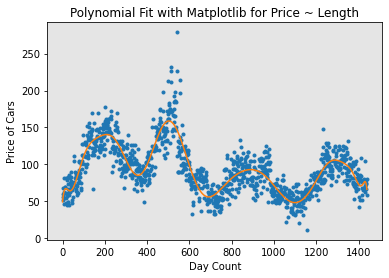

In [39]:
PlotPolly(p,x,y,'Day Count')

In [40]:
from sklearn.metrics import r2_score as r2

# r2 for training data
r_squared=r2(y,p(x))
r_squared

0.736237578442641

In [41]:
# Checking r2 for test data
X=test['Count']
Y=test['Total']
r_squared=r2(Y,p(X))
r_squared

0.7269176419191287

### Decision Tree

In [42]:
v=[]

for i in range(0,len(df1)):
    x=df1['date'][i].year
    v.append(x)
    
df1['year']=v

In [43]:
df1.head()

,date,portname,country,passenger,cargo,tanker,pleasureCraft,fishing,tug,other,latitude,longitude,day_of_month,day_of_week,month_of_year,Total,year
0,2017-07-15,MUMBAI,India,0,8,13,0,0,5,34,18.9483,72.8442,15,6,7,60,2017
1,2017-07-15,KAKINADA,India,0,1,0,0,0,0,7,16.9313,82.3058,15,6,7,8,2017
2,2017-07-15,KOLKATA ANCH,India,0,6,2,0,0,0,0,20.9870,88.0019,15,6,7,8,2017
3,2017-07-15,KATTUPALLI,India,0,0,0,0,0,0,2,13.3047,80.3561,15,6,7,2,2017
4,2017-07-15,PANAJI,India,0,0,0,0,0,0,2,15.4826,73.7996,15,6,7,2,2017


In [44]:
df2.head()

,PortName,Latitude,Longitude,Coast,Size,color
0,BADAPUTI,19.3039,84.9655,Eastern,Small,icon2.png
1,BEYPORE,11.1736,75.8040,Western,Very Small,icon1.png
2,BHARATI SHIPYARD,17.0405,73.2863,Western,Very Small,icon1.png
3,BHAVNAGAR,21.8029,72.1157,Western,Very Small,icon1.png
4,BHAVNAGAR NEW PORT,21.7609,72.2334,Western,Very Small,icon1.png


In [45]:
v=[]

for i in range(0,len(df1)):
    x=df1['portname'][i]
    val=0
    for j in range(0,len(df2)):
        y=df2['PortName'][j]
        if x==y:
            val=df2['Size'][j]
    v.append(val)
        
df1['portSize']=v

In [46]:
print(len(df1),len(v))

75768 75768


In [47]:
df1.head()

,date,portname,country,passenger,cargo,tanker,pleasureCraft,fishing,tug,other,latitude,longitude,day_of_month,day_of_week,month_of_year,Total,year,portSize
0,2017-07-15,MUMBAI,India,0,8,13,0,0,5,34,18.9483,72.8442,15,6,7,60,2017,Large
1,2017-07-15,KAKINADA,India,0,1,0,0,0,0,7,16.9313,82.3058,15,6,7,8,2017,Medium
2,2017-07-15,KOLKATA ANCH,India,0,6,2,0,0,0,0,20.9870,88.0019,15,6,7,8,2017,Large
3,2017-07-15,KATTUPALLI,India,0,0,0,0,0,0,2,13.3047,80.3561,15,6,7,2,2017,Very Small
4,2017-07-15,PANAJI,India,0,0,0,0,0,0,2,15.4826,73.7996,15,6,7,2,2017,Small


In [48]:
df1['portSize'].value_counts()

Medium        21146
Small         19887
Large         18555
Very Small    16180
Name: portSize, dtype: int64

In [49]:
size_list=['Very Small','Small','Medium','Large','Very Large']
size_marker=[1,2,3,4,5]

In [50]:
v=[]

for i in range(0,len(df1)):
    x=df1['portSize'][i]
    for j in range(0,len(size_list)):
        y=size_list[j]
        if x==y:
            val=size_marker[j]
    v.append(val)

df1['size_mark']=v

In [51]:
df1.head()

,date,portname,country,passenger,cargo,tanker,pleasureCraft,fishing,tug,other,latitude,longitude,day_of_month,day_of_week,month_of_year,Total,year,portSize,size_mark
0,2017-07-15,MUMBAI,India,0,8,13,0,0,5,34,18.9483,72.8442,15,6,7,60,2017,Large,4
1,2017-07-15,KAKINADA,India,0,1,0,0,0,0,7,16.9313,82.3058,15,6,7,8,2017,Medium,3
2,2017-07-15,KOLKATA ANCH,India,0,6,2,0,0,0,0,20.9870,88.0019,15,6,7,8,2017,Large,4
3,2017-07-15,KATTUPALLI,India,0,0,0,0,0,0,2,13.3047,80.3561,15,6,7,2,2017,Very Small,1
4,2017-07-15,PANAJI,India,0,0,0,0,0,0,2,15.4826,73.7996,15,6,7,2,2017,Small,2


In [52]:
from sklearn.metrics import accuracy_score as score

In [53]:
df_tot=df1[['latitude','longitude','size_mark','day_of_month','month_of_year','day_of_week','Total']]

In [54]:
df_tot.head()

,latitude,longitude,size_mark,day_of_month,month_of_year,day_of_week,Total
0,18.9483,72.8442,4,15,7,6,60
1,16.9313,82.3058,3,15,7,6,8
2,20.9870,88.0019,4,15,7,6,8
3,13.3047,80.3561,1,15,7,6,2
4,15.4826,73.7996,2,15,7,6,2


In [55]:
df_tot.corr()

,latitude,longitude,size_mark,day_of_month,month_of_year,day_of_week,Total
latitude,1.000000,-0.269541,0.000960,-0.000153,-0.000577,0.001759,0.099653
longitude,-0.269541,1.000000,0.109047,0.000701,-0.000777,0.000706,-0.176957
size_mark,0.000960,0.109047,1.000000,-0.003667,0.001441,0.000758,0.359024
day_of_month,-0.000153,0.000701,-0.003667,1.000000,0.016409,0.000594,0.002368
month_of_year,-0.000577,-0.000777,0.001441,0.016409,1.000000,0.002340,-0.013767
day_of_week,0.001759,0.000706,0.000758,0.000594,0.002340,1.000000,-0.007875
Total,0.099653,-0.176957,0.359024,0.002368,-0.013767,-0.007875,1.000000


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [57]:
X=np.asarray(df_tot[['latitude','longitude','size_mark','day_of_month','month_of_year','day_of_week']])
y=np.asarray(df_tot[['Total']])

In [58]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=2)

In [59]:
# Modelling
portTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
portTree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [60]:
portTree.fit(X_trainset,y_trainset)
predTree = portTree.predict(X_testset)

In [61]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.16369715366679866


In [62]:
print(X_testset[:2])
print(y_testset[:2])
print(predTree[:2])

[[17.6959 83.2873  4.     17.      2.      1.    ]
 [20.1271 86.735   1.     28.      4.      3.    ]]
[[19]
 [10]]
[5 9]


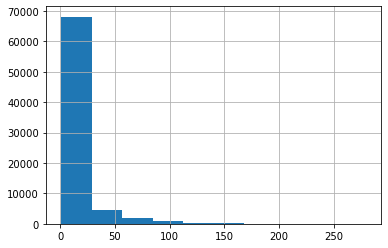

In [63]:
df_tot['Total'].hist()

In [64]:
bins=np.linspace(0, 300, 31)
bins

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300.])

In [65]:
val=np.arange(1,31,1)
val

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [66]:
df_tot['Total-binned'] = pd.cut(df_tot['Total'], bins, labels=val, include_lowest=True )
df_tot[['Total','Total-binned']].head(10)

<ipython-input-66-f9c429ffa9f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot['Total-binned'] = pd.cut(df_tot['Total'], bins, labels=val, include_lowest=True )


,Total,Total-binned
0,60,6
1,8,1
2,8,1
3,2,1
4,2,1
5,3,1
6,9,1
7,13,2
8,41,5
9,3,1


In [67]:
df_tot.head()

,latitude,longitude,size_mark,day_of_month,month_of_year,day_of_week,Total,Total-binned
0,18.9483,72.8442,4,15,7,6,60,6
1,16.9313,82.3058,3,15,7,6,8,1
2,20.9870,88.0019,4,15,7,6,8,1
3,13.3047,80.3561,1,15,7,6,2,1
4,15.4826,73.7996,2,15,7,6,2,1


In [68]:
df_tot.shape

(75768, 8)

In [69]:
from sklearn import preprocessing

In [70]:
X=np.asarray(df_tot[['latitude','longitude','size_mark','day_of_month','month_of_year','day_of_week']])
y1=np.asarray(df_tot[['Total-binned']])
y=np.asarray(df_tot[['Total']])

In [71]:
transform = preprocessing.StandardScaler()

In [72]:
X=transform.fit(X).transform(X)

In [73]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y1, test_size=0.3, random_state=2)

In [74]:
# Modelling
portTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
portTree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [75]:
portTree.fit(X_trainset,y_trainset)
predTree = portTree.predict(X_testset)

In [76]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7587875588403502


In [77]:
#print(X_testset[0:5])
print(y_testset[0:10])
print(predTree[0:10])

[[2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]]
[1 1 1 1 1 1 1 1 1 2]


### DecisionTreeRegressor using GridSearchCV

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

In [79]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=2)

In [80]:
parameters = {#'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
     'splitter': ['best', 'random'],
     'max_depth': [1,2,3,4,5],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

portReg=DecisionTreeRegressor()

In [81]:
portReg_cv=GridSearchCV(portReg, parameters)
portReg_cv.fit(X_trainset,y_trainset)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [82]:
print("tuned hpyerparameters :(best parameters) ",portReg_cv.best_params_)
print("DecisionTreeRegressor Training set Accuracy :",portReg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeRegressor Training set Accuracy : 0.8360237157355532


In [83]:
yhat=portReg_cv.predict(X_testset)
print("DecisionTreeRegressor Test set Accuracy: ",r2(y_testset,yhat))
print("DecisionTreeRegressor MSE: ",mse(y_testset,yhat))

DecisionTreeRegressor Test set Accuracy:  0.8564763240370449
DecisionTreeRegressor MSE:  52.463957251902755


In [84]:
print(y_testset[0:5])
print(yhat[0:5])

[[19]
 [10]
 [ 2]
 [ 4]
 [ 1]]
[11.31120982  7.13240513  1.51743265  4.67280519  5.11738896]


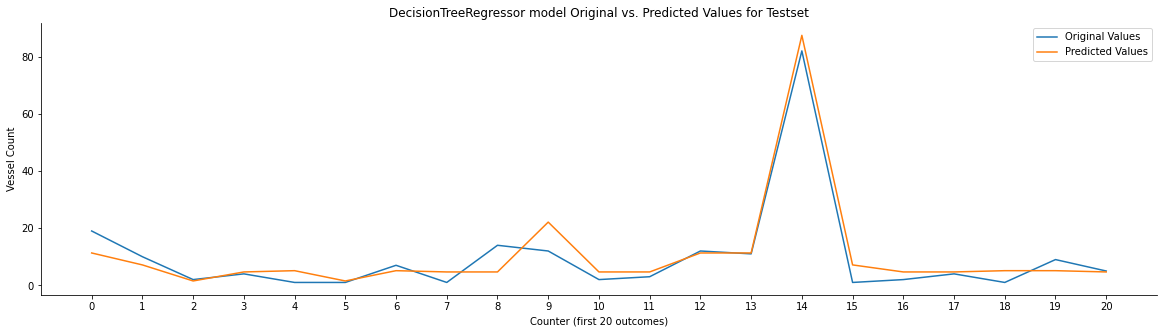

In [85]:
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot()
plt.plot(np.array(range(0,21)),y_testset[0:21])
plt.plot(np.array(range(0,21)),yhat[0:21])
plt.legend(labels=['Original Values','Predicted Values'])
plt.title('DecisionTreeRegressor model Original vs. Predicted Values for Testset')
ax.set_xlabel('Counter (first 20 outcomes)')
ax.set_ylabel('Vessel Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.linspace(0,20,21))
#for p in ax.patches:
 #   ax.annotate('%2.0f'%p.get_y(), (p.get_x(), p.get_y()),fontweight='bold',fontsize=10)
plt.show()

In [86]:
#import pickle

In [87]:
#filename='Total_Port_Traffic_Regressor'
#pickle.dump(portReg_cv,open(filename,'wb'))

### DecisionTreeRegressor for ports categorized as very small

In [88]:
df_tot.dtypes

latitude          float64
longitude         float64
size_mark           int64
day_of_month        int64
month_of_year       int64
day_of_week         int64
Total               int64
Total-binned     category
dtype: object

In [89]:
df_vs=df_tot[df_tot['size_mark']==1].reset_index().drop('index', axis=1)

In [90]:
df_vs.head()

,latitude,longitude,size_mark,day_of_month,month_of_year,day_of_week,Total,Total-binned
0,13.3047,80.3561,1,15,7,6,2,1
1,21.7609,72.2334,1,15,7,6,3,1
2,20.1271,86.7350,1,15,7,6,9,1
3,17.2966,73.2155,1,15,7,6,1,1
4,15.5517,73.9624,1,15,7,6,2,1


In [91]:
df_vs.shape

(16180, 8)

In [93]:
X=np.asarray(df_vs[['latitude','longitude','day_of_month','month_of_year','day_of_week']])
y=np.asarray(df_vs[['Total']])

In [94]:
X=transform.fit(X).transform(X)

In [95]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=2)

In [96]:
vsReg=DecisionTreeRegressor()

In [97]:
vsReg_cv=GridSearchCV(vsReg, parameters)
vsReg_cv.fit(X_trainset,y_trainset)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [98]:
print("tuned hpyerparameters :(best parameters) ",vsReg_cv.best_params_)
print("DecisionTreeRegressor Training set Accuracy :",vsReg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeRegressor Training set Accuracy : 0.46186793114621344


In [99]:
yhat=vsReg_cv.predict(X_testset)
print("DecisionTreeRegressor Test set Accuracy: ",r2(y_testset,yhat))
print("DecisionTreeRegressor MSE: ",mse(y_testset,yhat))

DecisionTreeRegressor Test set Accuracy:  0.4823126939067972
DecisionTreeRegressor MSE:  11.49799424696697


In [100]:
print(y_testset[0:5])
print(yhat[0:5])

[[1]
 [2]
 [1]
 [1]
 [2]]
[1.85436893 4.06890756 1.58801498 4.06890756 4.06890756]


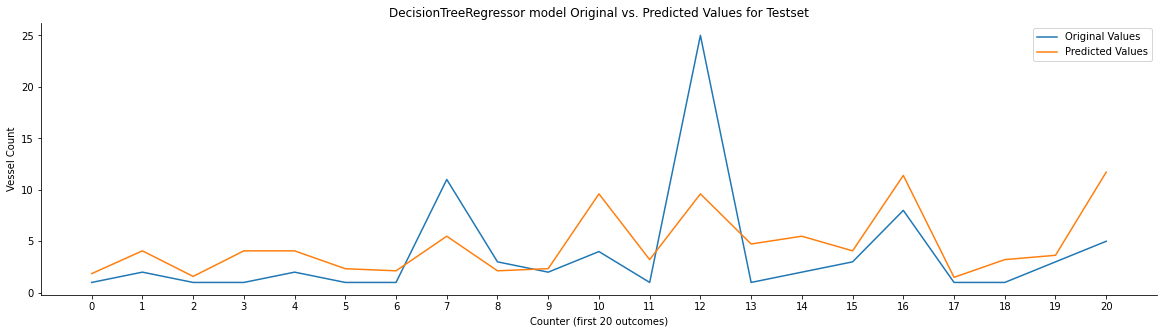

In [101]:
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot()
plt.plot(np.array(range(0,21)),y_testset[0:21])
plt.plot(np.array(range(0,21)),yhat[0:21])
plt.legend(labels=['Original Values','Predicted Values'])
plt.title('DecisionTreeRegressor model Original vs. Predicted Values for Testset')
ax.set_xlabel('Counter (first 20 outcomes)')
ax.set_ylabel('Vessel Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.linspace(0,20,21))
#for p in ax.patches:
 #   ax.annotate('%2.0f'%p.get_y(), (p.get_x(), p.get_y()),fontweight='bold',fontsize=10)
plt.show()

### DecisionTreeRegressor for ports categorized as small

In [102]:
df_s=df_tot[df_tot['size_mark']==2].reset_index().drop('index', axis=1)

In [103]:
df_s.head()

,latitude,longitude,size_mark,day_of_month,month_of_year,day_of_week,Total,Total-binned
0,15.4826,73.7996,2,15,7,6,2,1
1,22.4604,69.8180,2,15,7,6,13,2
2,13.2299,80.4079,2,15,7,6,2,1
3,14.7722,74.1343,2,15,7,6,1,1
4,21.0297,72.5729,2,15,7,6,10,1


In [104]:
df_s.shape

(19887, 8)

In [105]:
X=np.asarray(df_s[['latitude','longitude','day_of_month','month_of_year','day_of_week']])
y=np.asarray(df_s[['Total']])

In [106]:
X=transform.fit(X).transform(X)

In [107]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=2)

In [108]:
sReg=DecisionTreeRegressor()

In [109]:
sReg_cv=GridSearchCV(sReg, parameters)
sReg_cv.fit(X_trainset,y_trainset)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [110]:
print("tuned hpyerparameters :(best parameters) ",sReg_cv.best_params_)
print("DecisionTreeRegressor Training set Accuracy :",sReg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
DecisionTreeRegressor Training set Accuracy : 0.6986626368497296


In [111]:
yhat=sReg_cv.predict(X_testset)
print("DecisionTreeRegressor Test set Accuracy: ",r2(y_testset,yhat))
print("DecisionTreeRegressor MSE: ",mse(y_testset,yhat))

DecisionTreeRegressor Test set Accuracy:  0.7102176248026556
DecisionTreeRegressor MSE:  18.102781093934414


In [112]:
print(y_testset[0:5])
print(yhat[0:5])

[[ 1]
 [ 3]
 [ 6]
 [ 5]
 [11]]
[2.75319567 6.62606232 4.11620553 4.11620553 7.68715084]


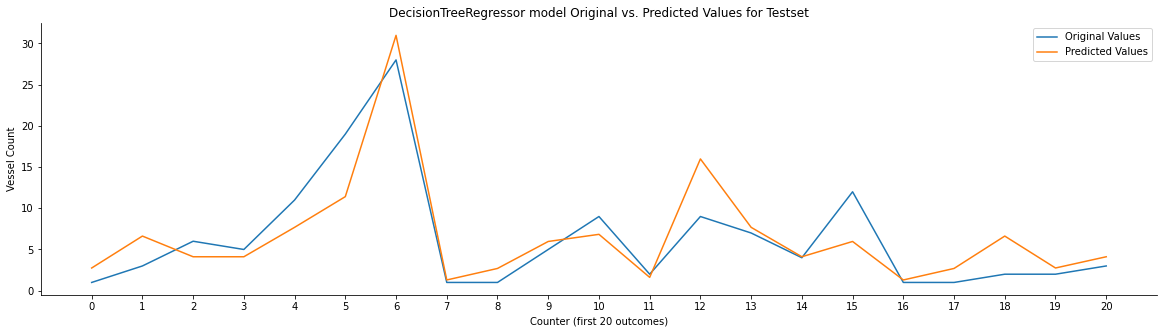

In [113]:
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot()
plt.plot(np.array(range(0,21)),y_testset[0:21])
plt.plot(np.array(range(0,21)),yhat[0:21])
plt.legend(labels=['Original Values','Predicted Values'])
plt.title('DecisionTreeRegressor model Original vs. Predicted Values for Testset')
ax.set_xlabel('Counter (first 20 outcomes)')
ax.set_ylabel('Vessel Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.linspace(0,20,21))
#for p in ax.patches:
 #   ax.annotate('%2.0f'%p.get_y(), (p.get_x(), p.get_y()),fontweight='bold',fontsize=10)
plt.show()

### DecisionTreeRegressor for ports cateorized as medium

In [114]:
df_m=df_tot[df_tot['size_mark']==3].reset_index().drop('index', axis=1)

In [115]:
df_m.head()

,latitude,longitude,size_mark,day_of_month,month_of_year,day_of_week,Total,Total-binned
0,16.9313,82.3058,3,15,7,6,8,1
1,20.8687,71.4798,3,15,7,6,3,1
2,8.7819,78.1949,3,15,7,6,9,1
3,22.6637,69.6482,3,15,7,6,13,2
4,12.9268,74.8062,3,15,7,6,3,1


In [116]:
df_m.shape

(21146, 8)

In [118]:
X=np.asarray(df_m[['latitude','longitude','day_of_month','month_of_year','day_of_week']])
y=np.asarray(df_m[['Total']])

In [119]:
X

array([[16.9313, 82.3058, 15.    ,  7.    ,  6.    ],
       [20.8687, 71.4798, 15.    ,  7.    ,  6.    ],
       [ 8.7819, 78.1949, 15.    ,  7.    ,  6.    ],
       ...,
       [22.756 , 69.6364, 22.    ,  6.    ,  2.    ],
       [20.9175, 71.5051, 22.    ,  6.    ,  2.    ],
       [22.7143, 70.074 , 22.    ,  6.    ,  2.    ]])

In [120]:
X=transform.fit(X).transform(X)

In [121]:
X

array([[-0.29994994,  1.3663651 , -0.08642089,  0.14482629,  1.00314411],
       [ 0.50187971, -0.62967303, -0.08642089,  0.14482629,  1.00314411],
       [-1.95953002,  0.60842004, -0.08642089,  0.14482629,  1.00314411],
       ...,
       [ 0.88621788, -0.96954895,  0.71144558, -0.1396866 , -0.99581792],
       [ 0.51181756, -0.62500836,  0.71144558, -0.1396866 , -0.99581792],
       [ 0.87772591, -0.88886668,  0.71144558, -0.1396866 , -0.99581792]])

In [122]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=2)

In [123]:
mReg=DecisionTreeRegressor()

In [124]:
mReg_cv=GridSearchCV(mReg,parameters)
mReg_cv.fit(X_trainset,y_trainset)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [125]:
print("tuned hpyerparameters :(best parameters) ",mReg_cv.best_params_)
print("DecisionTreeRegressor Training set Accuracy :",mReg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeRegressor Training set Accuracy : 0.8417455846300594


In [126]:
yhat=mReg_cv.predict(X_testset)
print("DecisionTreeRegressor Test set Accuracy: ",r2(y_testset,yhat))
print("DecisionTreeRegressor MSE: ",mse(y_testset,yhat))

DecisionTreeRegressor Test set Accuracy:  0.8442465723555594
DecisionTreeRegressor MSE:  44.28847688778284


In [127]:
print(y_testset[0:5])
print(yhat[0:5])

[[ 4]
 [ 7]
 [ 1]
 [39]
 [ 5]]
[ 5.32236842  8.60529344  2.57679558 28.79442509  6.34636651]


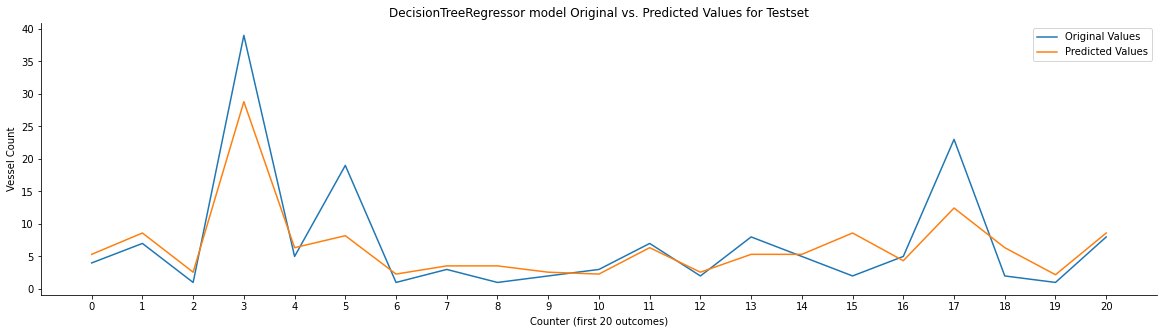

In [128]:
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot()
plt.plot(np.array(range(0,21)),y_testset[0:21])
plt.plot(np.array(range(0,21)),yhat[0:21])
plt.legend(labels=['Original Values','Predicted Values'])
plt.title('DecisionTreeRegressor model Original vs. Predicted Values for Testset')
ax.set_xlabel('Counter (first 20 outcomes)')
ax.set_ylabel('Vessel Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.linspace(0,20,21))
#for p in ax.patches:
 #   ax.annotate('%2.0f'%p.get_y(), (p.get_x(), p.get_y()),fontweight='bold',fontsize=10)
plt.show()

### DecisionTreeRegessor foe ports categorized as large

In [129]:
df_l=df_tot[df_tot['size_mark']==4].reset_index().drop('index', axis=1)

In [130]:
df_l.head()

,latitude,longitude,size_mark,day_of_month,month_of_year,day_of_week,Total,Total-binned
0,18.9483,72.8442,4,15,7,6,60,6
1,20.9870,88.0019,4,15,7,6,8,1
2,18.9080,72.6010,4,15,7,6,41,5
3,13.1031,80.3819,4,15,7,6,3,1
4,9.9546,76.2678,4,15,7,6,12,2


In [131]:
df_l.shape

(18555, 8)

In [132]:
X=np.asarray(df_l[['latitude','longitude','day_of_month','month_of_year','day_of_week']])
y=np.asarray(df_l[['Total']])

In [133]:
X

array([[18.9483, 72.8442, 15.    ,  7.    ,  6.    ],
       [20.987 , 88.0019, 15.    ,  7.    ,  6.    ],
       [18.908 , 72.601 , 15.    ,  7.    ,  6.    ],
       ...,
       [23.0185, 70.2311, 22.    ,  6.    ,  2.    ],
       [20.987 , 88.0019, 22.    ,  6.    ,  2.    ],
       [ 9.9546, 76.2678, 23.    ,  6.    ,  3.    ]])

In [134]:
X=transform.fit(X).transform(X)

In [135]:
X

array([[ 0.38628546, -1.06689499, -0.08471777,  0.13901969,  1.00064723],
       [ 0.8667265 ,  1.44133979, -0.08471777,  0.13901969,  1.00064723],
       [ 0.37678834, -1.10713874, -0.08471777,  0.13901969,  1.00064723],
       ...,
       [ 1.34547078, -1.49930019,  0.71223797, -0.14883996, -0.99827717],
       [ 0.8667265 ,  1.44133979,  0.71223797, -0.14883996, -0.99827717],
       [-1.73317428, -0.50037153,  0.82608878, -0.14883996, -0.49854607]])

In [136]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.1, random_state=2)

In [137]:
lReg=DecisionTreeRegressor()

In [138]:
lReg_cv=GridSearchCV(lReg,parameters)
lReg_cv.fit(X_trainset,y_trainset)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [139]:
print("tuned hpyerparameters :(best parameters) ",lReg_cv.best_params_)
print("DecisionTreeRegressor Training set Accuracy :",lReg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeRegressor Training set Accuracy : 0.8570922800200306


In [140]:
yhat=lReg_cv.predict(X_testset)
print("DecisionTreeRegressor Test set Accuracy: ",r2(y_testset,yhat))
print("DecisionTreeRegressor MSE: ",mse(y_testset,yhat))

DecisionTreeRegressor Test set Accuracy:  0.8710418048365763
DecisionTreeRegressor MSE:  112.86380662740721


In [141]:
print(y_testset[0:10])
print(yhat[0:10])

[[ 50]
 [ 17]
 [  2]
 [  7]
 [ 16]
 [ 14]
 [133]
 [ 42]
 [ 35]
 [ 11]]
[ 63.95774648  15.96060255   8.89881657   3.64215686  11.38888889
  15.96060255 108.96960486  15.96060255  18.52484472  15.96060255]


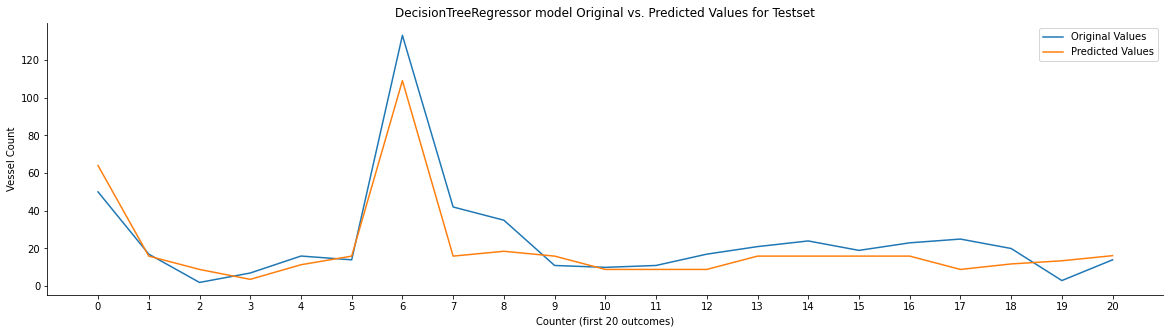

In [142]:
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot()
plt.plot(np.array(range(0,21)),y_testset[0:21])
plt.plot(np.array(range(0,21)),yhat[0:21])
plt.legend(labels=['Original Values','Predicted Values'])
plt.title('DecisionTreeRegressor model Original vs. Predicted Values for Testset')
ax.set_xlabel('Counter (first 20 outcomes)')
ax.set_ylabel('Vessel Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.linspace(0,20,21))
#for p in ax.patches:
 #   ax.annotate('%2.0f'%p.get_y(), (p.get_x(), p.get_y()),fontweight='bold',fontsize=10)
plt.show()